<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/FR_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
#from googletrans import Translator
import time
from google.colab import drive

# **French Youtube Data**

In [2]:
drive.mount('/content/drive/')
file_path = '/content/drive/My Drive/FR_youtube_trending_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive/


## **Data Inspection & Understanding**

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


In [4]:
df.shape

(268788, 16)

In [5]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [6]:
df.dtypes

,0
video_id,object
title,object
publishedAt,object
channelId,object
channelTitle,object
categoryId,int64
trending_date,object
tags,object
view_count,int64
likes,int64


In [7]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [8]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,268788.000000,2.687880e+05,2.687880e+05,268788.000000,2.687880e+05
mean,19.010901,1.063835e+06,6.435672e+04,475.876594,4.785934e+03
std,6.849234,4.713316e+06,3.016243e+05,6043.147667,5.905935e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,9.971675e+04,5.284000e+03,0.000000,2.440000e+02
50%,22.000000,2.229445e+05,1.210300e+04,0.000000,5.440000e+02
75%,24.000000,5.977732e+05,3.492725e+04,100.000000,1.454000e+03
max,29.000000,2.326492e+08,1.573559e+07,848977.000000,6.065284e+06


In [9]:
df.nunique()


,0
video_id,54170
title,55528
publishedAt,53128
channelId,6002
channelTitle,6300
categoryId,15
trending_date,1323
tags,37207
view_count,221846
likes,87832


## **Exploratory Data Analysis**

###### **Finding Skewness:**

<Axes: xlabel='view_count', ylabel='Count'>

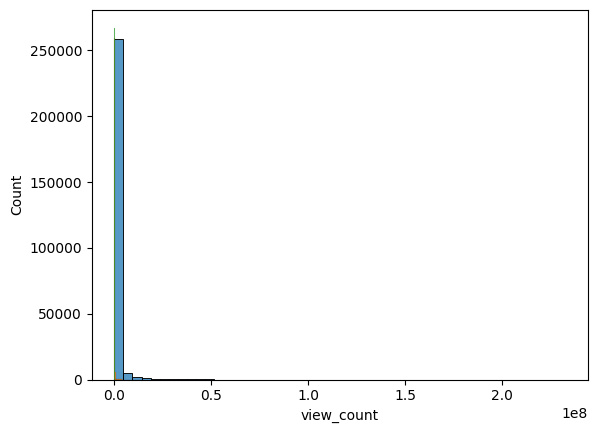

In [10]:
sns.histplot(df['view_count'], bins=50)
sns.histplot(df['likes'], bins=50)
sns.histplot(df['comment_count'], bins=50)

<Axes: xlabel='view_count', ylabel='Count'>

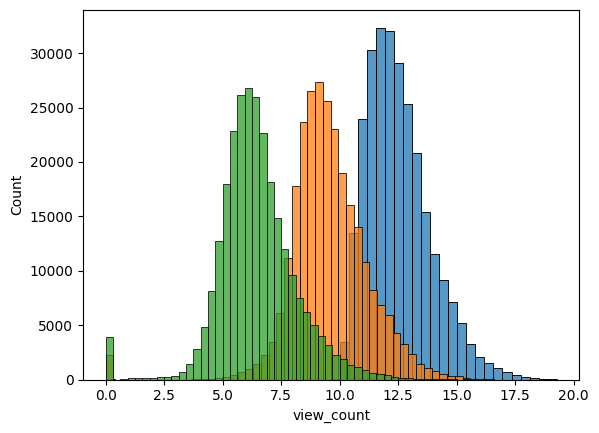

In [11]:
sns.histplot(np.log1p(df['view_count']), bins=50)
sns.histplot(np.log1p(df['likes']), bins=50)
sns.histplot(np.log1p(df['comment_count']), bins=50)


In [12]:
for col in ['view_count','likes','dislikes','comment_count']:
    df[f'log_{col}'] = np.log1p(df[col])

**based on the graph, features like views, likes, and comments are heavily right skewed meaning a few videos get huge numbers, and most get small counts of these features. Skewed features make it hard for models like Logistic Regression or Linear models to learn.**

**np.log1p(x) calculates the natural logarithm of 1 + x. I use log1p instead of just log to handle cases where the value is 0, as log(0) is undefined, while log1p(0) is 0.**

**By taking the log of these values, we are compressing the large values much more than the smaller values. This pulls in the long tail of the distribution, making it more symmetrical and closer to a normal distribution.**

**This transformation helps the model to better capture the relationships between the features and the target variable, especially for linear models. It makes the extreme values less influential and the data more manageable for the model to learn from.**

## **Top Categories**

**Youtube has numerical codes, in this case catgeoryID values that are used to classify videos. For example number 1 is Film & Animation. This comes from youtube video category documentation**

In [13]:
df['categoryId'].max()

29

In [14]:
category_mapping = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals",
    17: "Sports", 19: "Travel & Events", 20: "Gaming", 22: "People & Blogs",
    23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style",
    27: "Education", 28: "Science & Technology", 29: "Nonprofits & Activism"
}
df['categoryName'] = df['categoryId'].map(category_mapping)

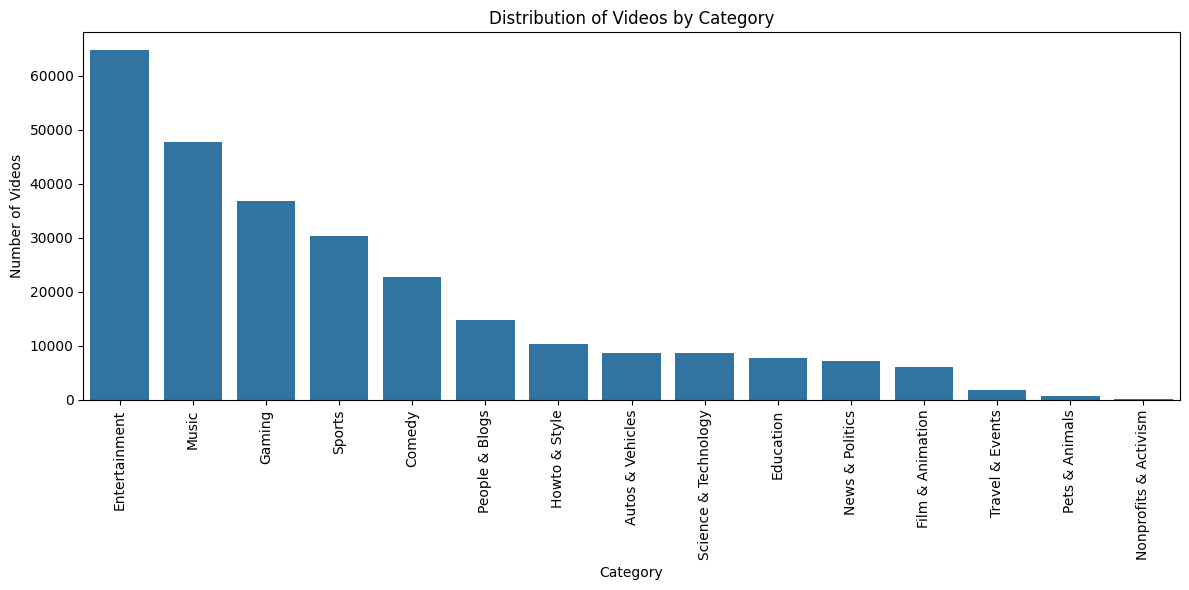

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='categoryName', data=df, order=df['categoryName'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Videos by Category')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

**Based on this chart, we can see entertainment as the most frequent video category, follwoed by gaming and music**

In [16]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count', 'categoryName'],
      dtype='object')

## **Looking at top correlating features**

<Axes: >

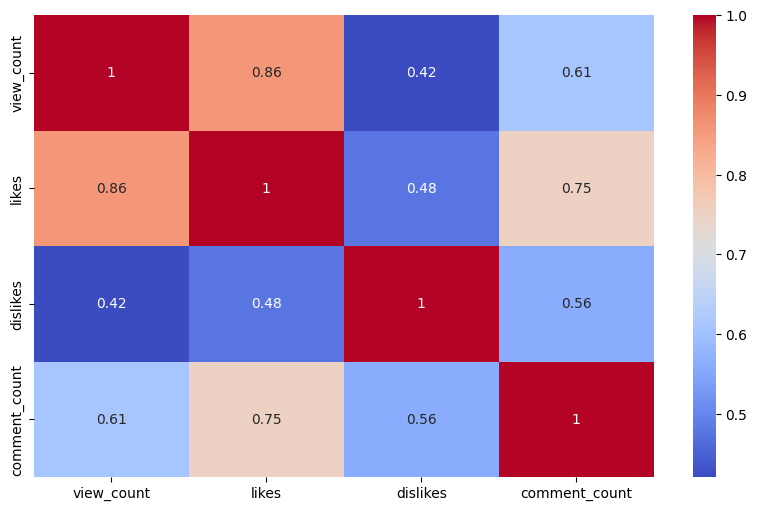

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['view_count','likes','dislikes','comment_count']].corr(), annot=True, cmap="coolwarm")


**Heatmap tells the correlation between features. views and likes are highly correlated. I will also visualize the distribution of videos across different categories to see which ones appear most frequently in the trending data**

## **Calculating days till trend**

**I will analyze the days_to_trend feature to see how long it typically takes for a video to appear on the trending list after it's published. I will generate a histogram to visualize its distribution.**

In [18]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

In [19]:
df['days_to_trend'] = (df['trending_date'] - df['publishedAt']).dt.days
df['days_to_trend'] = df['days_to_trend'].apply(lambda x: x if x >= 0 else np.nan)

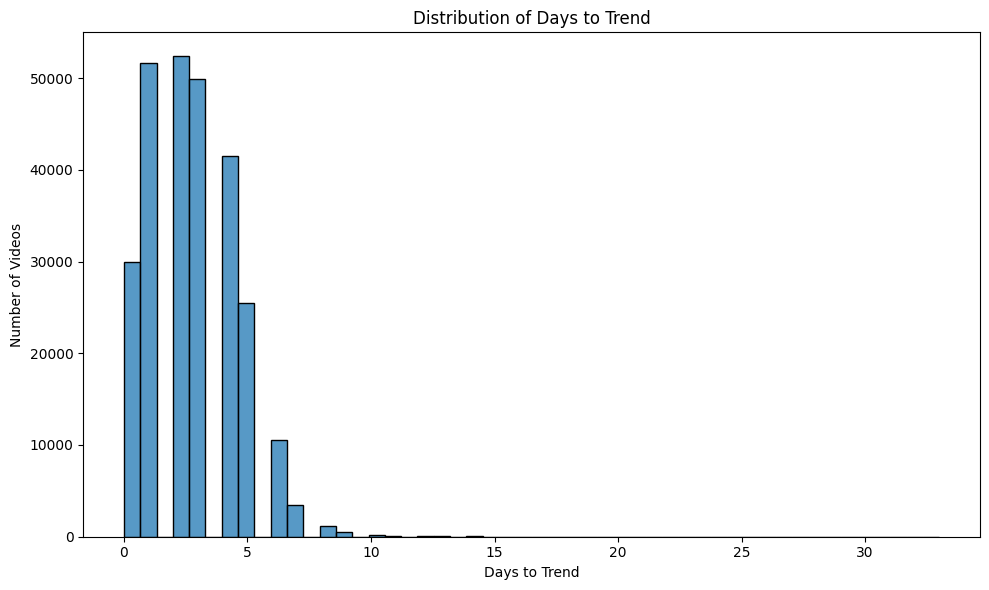

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['days_to_trend'].dropna(), bins=50)
plt.title('Distribution of Days to Trend')
plt.xlabel('Days to Trend')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

**Videos seem to be on trend the first fews days of being published. A peak around 0-5 days. So if a video does not trend quickly, it is less likely to trend at all**

In [21]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count', 'categoryName', 'days_to_trend'],
      dtype='object')

In [22]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [23]:
df.dropna(subset=['days_to_trend'], inplace=True)
print(df.shape)

(267052, 22)


**I will drop the missing values rows in the days_to_trend.**

In [24]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


## **Viral label top 10% of view count & time of Trend**

In [25]:
threshold = df['view_count'].quantile(0.90)
df['viral'] = (df['view_count'] >= threshold).astype(int)

In [26]:
df['publish_dayofweek'] = df['publishedAt'].dt.dayofweek

In [27]:
df['publish_hour'] = df['publishedAt'].dt.hour

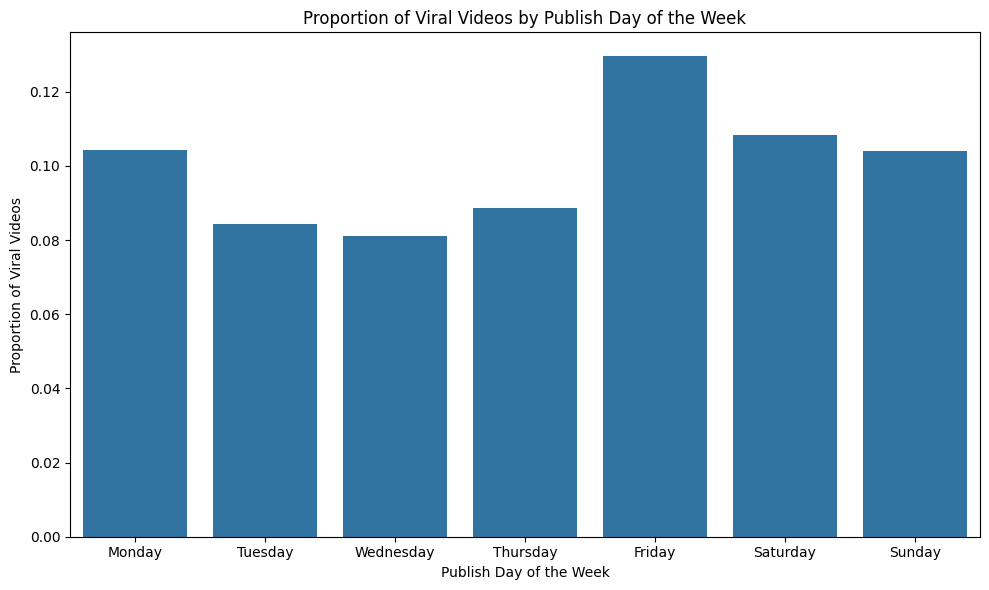

In [28]:
viral_by_day = df.groupby('publish_dayofweek')['viral'].mean().reset_index()
viral_by_day['publish_dayofweek'] = viral_by_day['publish_dayofweek'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='publish_dayofweek', y='viral', data=viral_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Proportion of Viral Videos by Publish Day of the Week')
plt.xlabel('Publish Day of the Week')
plt.ylabel('Proportion of Viral Videos')
plt.tight_layout()
plt.show()

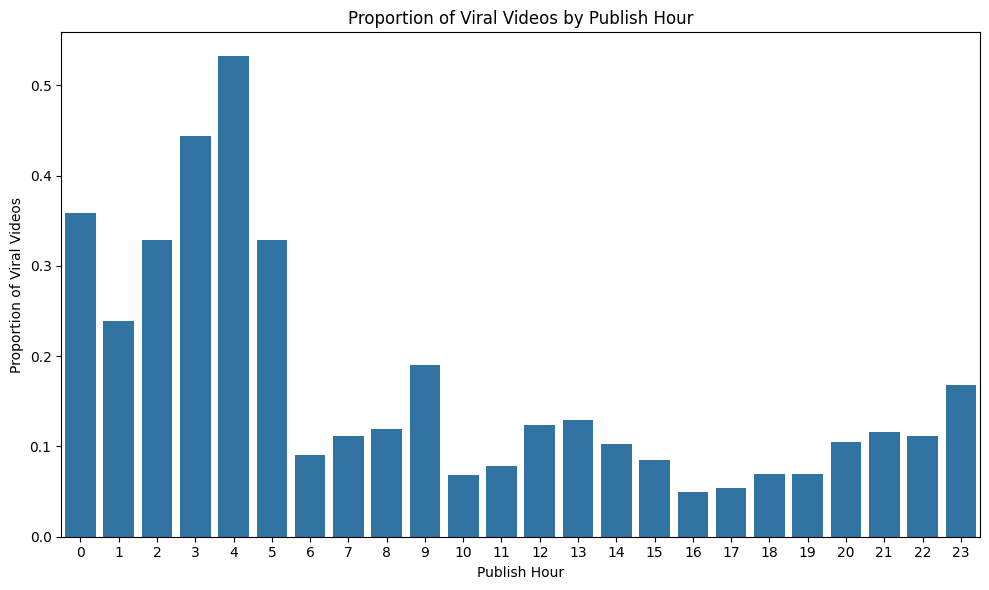

In [29]:
viral_by_hour = df.groupby('publish_hour')['viral'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='publish_hour', y='viral', data=viral_by_hour)
plt.title('Proportion of Viral Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Proportion of Viral Videos')
plt.tight_layout()
plt.show()

**Turning this into a binary classification problem, viral vs not viral.**

**Top 10% by view countmeans viral.**

**We are taking the date and time in consideration, French videos that go viral seem to be published around 4am / early morning. And the published peak day is friday, and high counts through the weekend**

## **Analyzing titles & descriptions**

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
french_stop_words = list(stopwords.words('french'))

df['text'] = (
    df['title'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['tags'].fillna('')
)

tfidf = TfidfVectorizer(max_features=5000, stop_words=french_stop_words)
X_tfidf = tfidf.fit_transform(df['text'])

**Text length can indicate quality, more descriptive titles or descriptions or more tags might increase visibility. text features can capture important information about the video's content and how it's presented, which could certainly influence whether it goes viral.**

## **Most Common Words in Titles and Tags**

In [32]:
df['title_tags'] = df['title'].fillna('') + ' ' + df['tags'].replace('[None]', '').fillna('')

tfidf_words = TfidfVectorizer(stop_words=french_stop_words)
tfidf_matrix_words = tfidf_words.fit_transform(df['title_tags'])

words = tfidf_words.get_feature_names_out()

word_scores = tfidf_matrix_words.sum(axis=0)

word_score_dict = dict(zip(words, word_scores.tolist()[0]))
sorted_words = sorted(word_score_dict.items(), key=lambda item: item[1], reverse=True)

top_n = 20
print(f"Top {top_n} most common words in titles and tags:")
for word, score in sorted_words[:top_n]:
    print(f"{word}: {score:.2f}")

Top 20 most common words in titles and tags:
fortnite: 3092.66
france: 2288.08
minecraft: 2250.05
clip: 2222.09
of: 1863.25
officiel: 1805.41
video: 1797.60
the: 1768.78
humour: 1651.73
résumé: 1587.95
plus: 1517.02
rap: 1441.24
vlog: 1401.37
vs: 1392.50
football: 1357.36
squeezie: 1334.55
histoire: 1296.29
michou: 1213.05
vidéo: 1204.83
paris: 1197.75


## Word Cloud for Viral Videos

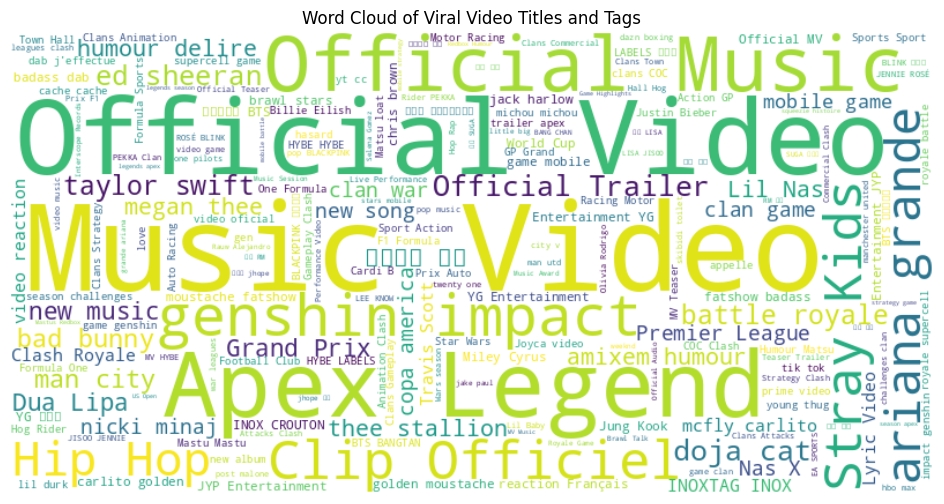

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

viral_df = df[df['viral'] == 1]
viral_title_tags_text = ' '.join(viral_df['title'].fillna('') + ' ' + viral_df['tags'].replace('[None]', '').fillna(''))

combined_stopwords = set(STOPWORDS).union(set(french_stop_words))

wordcloud_viral = WordCloud(width=800, height=400, background_color='white', stopwords=combined_stopwords).generate(viral_title_tags_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_viral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Viral Video Titles and Tags')
plt.show()

## **Categorical featuring**

In [34]:
df.dtypes

,0
video_id,object
title,object
publishedAt,"datetime64[ns, UTC]"
channelId,object
channelTitle,object
categoryId,int64
trending_date,"datetime64[ns, UTC]"
tags,object
view_count,int64
likes,int64


In [35]:
numeric_features = df[[
    'log_likes','log_dislikes','log_comment_count','days_to_trend',
    'publish_dayofweek','publish_hour',
    'comments_disabled','ratings_disabled',
]].fillna(0)

numeric_features['comments_disabled'] = numeric_features['comments_disabled'].astype(int)
numeric_features['ratings_disabled'] = numeric_features['ratings_disabled'].astype(int)

numeric_features = numeric_features.astype(float)
print(numeric_features.dtypes)
print(numeric_features.head())


log_likes            float64
log_dislikes         float64
log_comment_count    float64
days_to_trend        float64
publish_dayofweek    float64
publish_hour         float64
comments_disabled    float64
ratings_disabled     float64
dtype: object
   log_likes  log_dislikes  log_comment_count  days_to_trend  \
0  12.017077      8.342602           9.666372            0.0   
1  12.756619      7.925880           8.991064            0.0   
3  10.294245      6.037871           8.075272            0.0   
5  13.002974      8.752265           9.922407            2.0   
6  12.659366      7.821242           9.501068            1.0   

   publish_dayofweek  publish_hour  comments_disabled  ratings_disabled  
0                1.0          16.0                0.0               0.0  
1                1.0          10.0                0.0               0.0  
3                1.0          16.0                0.0               0.0  
5                6.0           8.0                0.0               0.0  

**If any NaN values, we will replace with 0. (imputation)
We would treat bool types as int 1 or 0.**

In [36]:
X_numeric = csr_matrix(numeric_features.values)

In [37]:
X = hstack([X_tfidf, X_numeric])
y = df['viral']

**Deals with numerical and text values for better machine learning model performance.**

In [38]:
print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Feature matrix shape: (267052, 5008)
Target distribution:
 viral
0    0.899997
1    0.100003
Name: proportion, dtype: float64


In [39]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


# **Modeling**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (213641, 5008)
Shape of X_test: (53411, 5008)
Shape of y_train: (213641,)
Shape of y_test: (53411,)


### **Logistic Regression**

In [41]:
model = LogisticRegression(solver='liblinear', random_state=42)

print("Training Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

Training Logistic Regression model...
Training complete.


Model Evaluation:
Accuracy: 0.9785063002003332

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     48070
           1       0.91      0.87      0.89      5341

    accuracy                           0.98     53411
   macro avg       0.95      0.93      0.94     53411
weighted avg       0.98      0.98      0.98     53411


Confusion Matrix:
 [[47606   464]
 [  684  4657]]


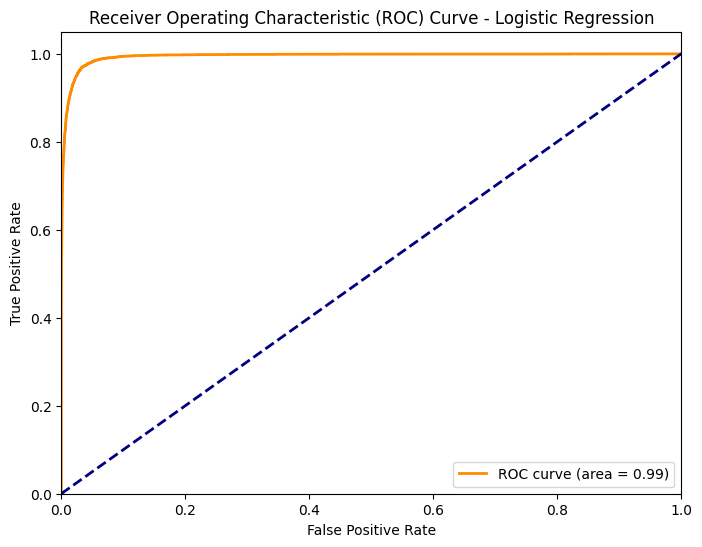


AUC-ROC Score: 0.9941012231468127


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate and plot AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print("\nAUC-ROC Score:", roc_auc)

**Overall accuracy of the logistic regression mode is 97%, but poor recall for viral class (underfitting minority class) . The model seems to perform more well on identifying non viral videos rather than viral ones.**

### **Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)
print("Training complete.")

Training Decision Tree model...
Training complete.


Decision Tree Model Evaluation:
Accuracy: 0.983598884124993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     48070
           1       0.92      0.92      0.92      5341

    accuracy                           0.98     53411
   macro avg       0.95      0.95      0.95     53411
weighted avg       0.98      0.98      0.98     53411


Confusion Matrix:
 [[47626   444]
 [  432  4909]]


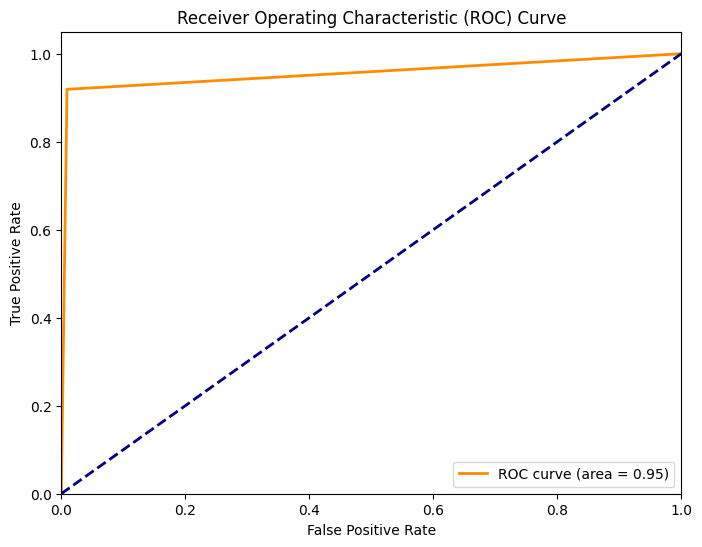


AUC-ROC Score: 0.9549398701505135


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Calculate and plot AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\nAUC-ROC Score:", roc_auc)

**Overall accuracy is great, and for identifying viral videos, metrics such as recall and f1 score improved. Decision tree model shows a clear improvement over the logistic regression model. but prone to overfitting**

### **Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")

Training Random Forest model...
Training complete.


Random Forest Model Evaluation:
Accuracy: 0.9871374810432308

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     48070
           1       0.92      0.96      0.94      5341

    accuracy                           0.99     53411
   macro avg       0.96      0.97      0.96     53411
weighted avg       0.99      0.99      0.99     53411


Confusion Matrix:
 [[47612   458]
 [  229  5112]]


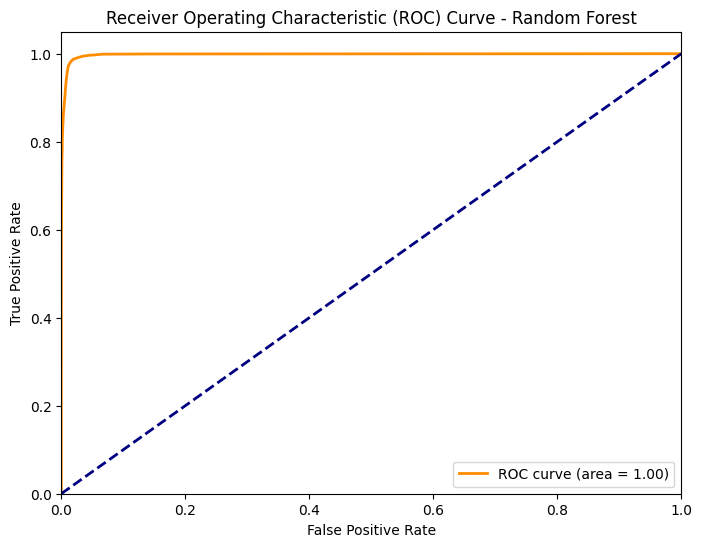


AUC-ROC Score: 0.9978970375965556


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Calculate and plot AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

print("\nAUC-ROC Score:", roc_auc)

**Overall highest accuracy of all previous models. Imprvoed significantly in recall and f1 score. So far random forrest has shown best performance. An increase in recall means the model is better at predicting viral videos.**

In [48]:
!pip install lightgbm

### **LighGBM**

In [49]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)

print("Training LightGBM model...")
lgb_model.fit(X_train, y_train)
print("Training complete.")

Training LightGBM model...
[LightGBM] [Info] Number of positive: 21365, number of negative: 192276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 21.294831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 936110
[LightGBM] [Info] Number of data points in the train set: 213641, number of used features: 5007
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100004 -> initscore=-2.197178
[LightGBM] [Info] Start training from score -2.197178
Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Model Evaluation:
Accuracy: 0.983168261219599

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     48070
           1       0.93      0.90      0.91      5341

    accuracy                           0.98     53411
   macro avg       0.96      0.95      0.95     53411
weighted avg       0.98      0.98      0.98     53411


Confusion Matrix:
 [[47681   389]
 [  510  4831]]


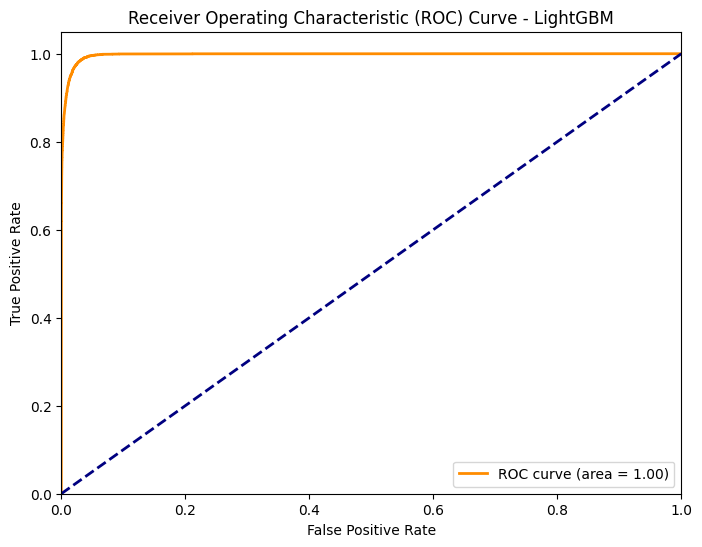


AUC-ROC Score: 0.9973634296579673


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("LightGBM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

# Calculate and plot AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

print("\nAUC-ROC Score:", roc_auc)

**Overall great performance, fast and high performance. Tie with random forest, great balance of precision and recall.**

# **Evaluation (Random Forest)**

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Hyperparameter tuning - **

### **Feature Importance**

In [ ]:
# Get feature importances from the trained random forest
importances = best_model.feature_importances_

# Combine feature names from TF-IDF and numeric features
tfidf_feature_names = tfidf.get_feature_names_out()
numeric_feature_names = numeric_features.columns
all_features = np.concatenate([tfidf_feature_names, numeric_feature_names])

# Sort by importance
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), all_features[indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.show()